In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
import pandas as pd

# Load training data (adjust separator if needed)
train_data = pd.read_csv(r"C:\Users\Surbhi\Desktop\codSoft1\train_data.csv", sep=':::', engine='python',  header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(train_data.head())
print(train_data.shape)

# Load test data
test_data = pd.read_csv(r"C:\Users\Surbhi\Desktop\codSoft1\test_data.csv", sep=':::', header=None, engine='python',  names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(test_data.head())
print(test_data.shape)

# Load test data solution
test_data_solution = pd.read_csv(r"C:\Users\Surbhi\Desktop\codSoft1\test_data_solution.csv", sep=':::', header=None, engine='python',  names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
print(test_data_solution.head())
print(test_data_solution.shape)


    ID                               TITLE       GENRE  \
0  "1        Oscar et la dame rose (2009)       drama    
1  "2                        Cupid (1997)    thriller    
2  "3    Young, Wild and Wonderful (1980)       adult    
3  "4               The Secret Sin (1915)       drama    
4  "5              The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  
(54214, 4)
    ID                          TITLE  \
0  "1           Edgar's Lunch (1998)    
1  "2       La guerra de papá (1977)    
2  "3    Off the Beaten Track (2010)    
3  "4         Meu Amigo Hindu (2015)    
4  "5              Er nu zhai (1955)    

                                               GENRE  DESCRIPTI

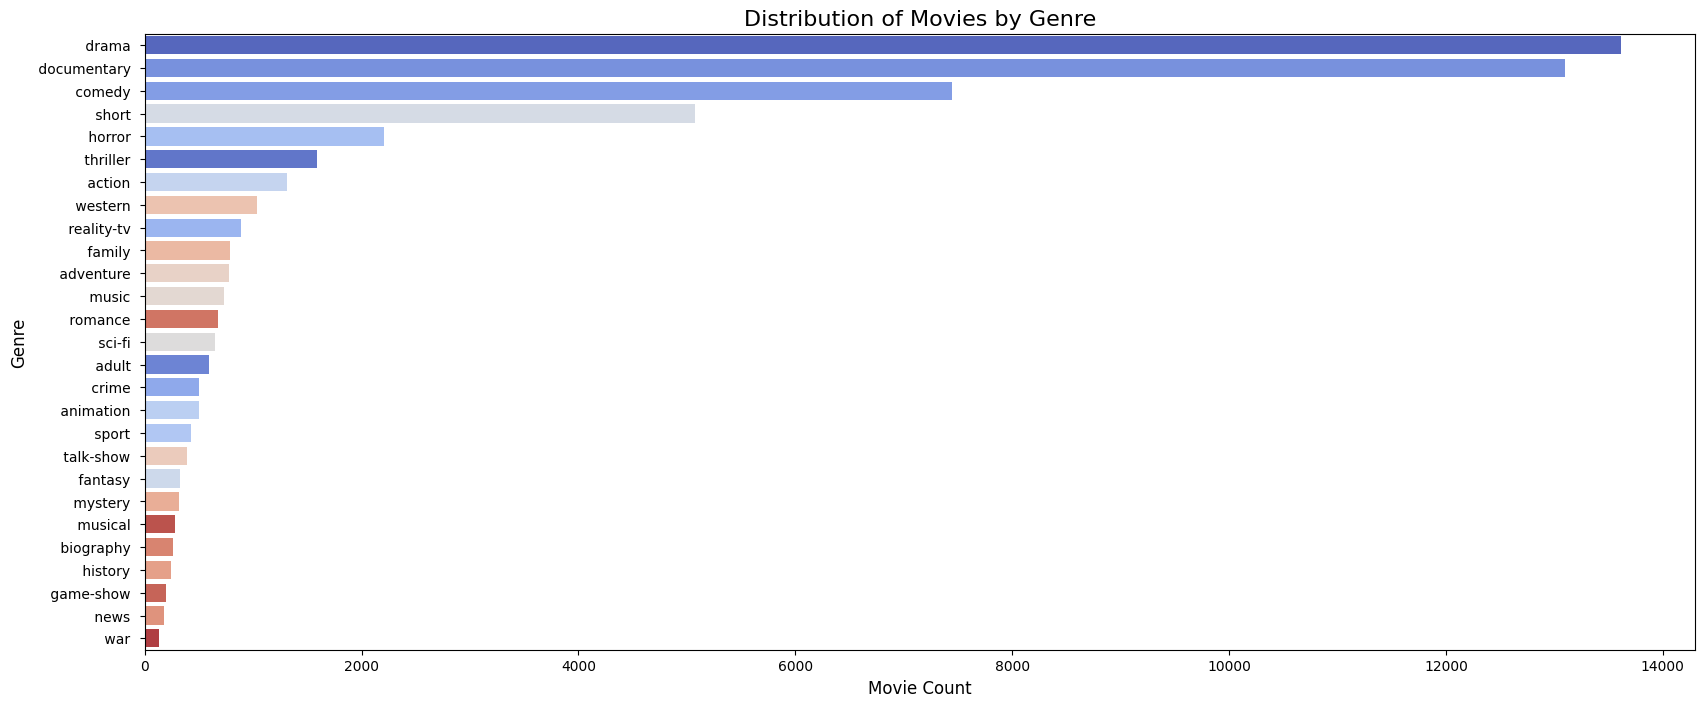

In [3]:
plt.figure(figsize=(20, 8))
sns.countplot(
    data=train_data, 
    y='GENRE', 
    hue='GENRE', 
    order=train_data['GENRE'].value_counts().index, 
    palette='coolwarm',   # changed to a multi-color palette
    dodge=False, 
    legend=False
)
plt.title('Distribution of Movies by Genre', fontsize=16)
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()



In [4]:
# Handle any potential missing values
train_data['DESCRIPTION'] = train_data['DESCRIPTION'].fillna("")
test_data['DESCRIPTION'] = test_data['DESCRIPTION'].fillna("")

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_data_solution['GENRE'])

In [5]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5844323526699253
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.32      0.38       263
           1       0.75      0.42      0.54       112
           2       0.45      0.21      0.28       139
           3       0.45      0.13      0.21       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.73      0.63      2697
           9       0.36      0.18      0.24       150
          10       0.19      0.04      0.07        74
          11       0.81      0.65      0.72        40
          12       0.00      0.00      0.00        45
          13       0.66      0.66      0.66       431
          14       0.62      0.54      0.58       144
          15       0.25      0.04      0.07        50
      

In [6]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

C:\Users\Surbhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Surbhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Surbhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [7]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [8]:
Mnb_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [10]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [14]:
lr_classifier.predict(X_test)

array([8, 8, 8, ..., 8, 8, 8])

In [30]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie1 = "A scientist builds a time machine to explore the future, but things go wrong."
print(predict_movie(sample_descr_for_movie1))

sample_descr_for_movie2 = "A haunted house where a group of friends are terrorized by a vengeful ghost."
print(predict_movie(sample_descr_for_movie2))

sample_descr_for_movie3 = "A group of friends end up in hilarious situations while trying to solve a mystery."
print(predict_movie(sample_descr_for_movie3))

 sci-fi 
 horror 
 comedy 
